In [4]:
import bayesiansurvivalanalysis as bsa
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
%matplotlib inline

In [5]:
from bayesiansurvivalanalysis import (model, bayes_network, utils)

In [6]:
data = pd.read_csv('data/simulation.csv')

In [7]:
data.head()

,events,time,X0,X1,X2,X3,X4,X5,X6,X7,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,0,16.980151,-0.067283,0.910142,-0.545079,-0.398013,0.659267,0.237606,1.287477,1.033594,...,0.185541,-0.743509,-1.224879,-1.714477,-0.204931,-1.553013,1.184851,-0.478874,-0.812232,-0.301569
1,1,4.254620,0.364085,-1.154092,-0.336250,-2.486027,1.756179,-0.603693,1.134709,-1.586164,...,0.071715,-1.234469,0.285617,0.446767,0.592565,0.257944,-0.055143,0.424745,0.255946,-0.118184
2,1,15.025325,0.603564,0.034544,-2.226574,-0.320510,0.645454,-0.808341,2.437021,-0.911619,...,0.434713,-0.384875,-1.001073,0.947520,-0.299186,-1.039956,-0.572406,-0.364988,-1.347714,0.351170
3,0,16.980151,0.644745,1.099674,-0.804016,0.321543,0.546014,-0.465808,0.227060,0.220490,...,0.008668,0.735421,-2.562495,-0.424252,-1.544134,1.415482,-0.996390,0.808946,0.216923,0.407765
4,0,16.980151,-1.166242,-0.075672,-0.153437,-2.559612,0.050996,-0.489098,0.421043,-1.919067,...,0.892744,-0.910565,0.505192,-0.335370,-0.144308,-0.092619,1.020254,1.021312,-0.645515,0.561669


In [8]:
children = {'X0': ['logalpha'],
            'X10': ['beta'],
            'X5': ['logalpha', 'beta'],
            'logalpha': ['S'],
            'beta': ['S'],
            'S': []}

In [9]:
bn = bayes_network.Bayes_Net(children)

In [10]:
curr_model = model.define_model(bn, data, status_col='events', time_col='time', save_all=False)

In [11]:
begin = utils.starting_parameters(bn)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_X10, b_sigma_j_X10, b_X5, b_sigma_j_X5, b_sigma_s, b0, a_X0, a_sigma_j_X0, a_X5, a_sigma_j_X5, a_sigma_s, a0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:03<00:00, 125.96draws/s]
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 68 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


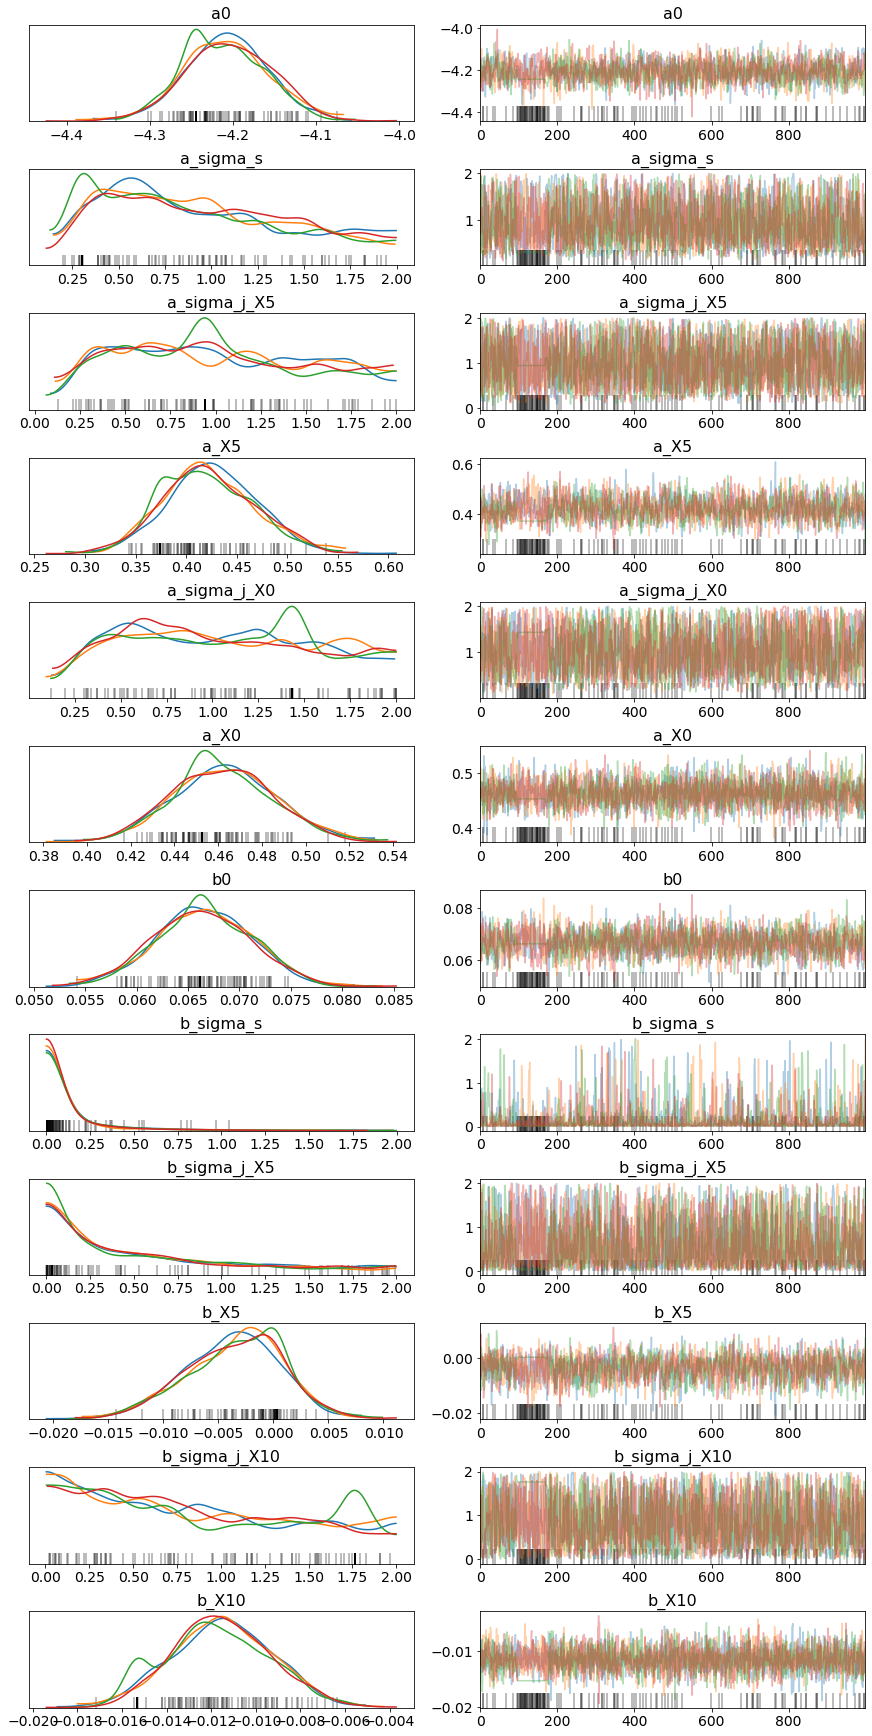

In [12]:
with curr_model:
    trace = pm.sample(1000, tune=1000, start=begin, cores=4) 
    pm.traceplot(trace)

In [13]:
for curr_var in trace.varnames:
    print(pm.stats.hpd(trace[curr_var]))

[1.78642742 1.84027374]
[-2.29005988  2.48448615]
[-2.47112068  2.80877153]
[0.22849782 0.34654202]
[-2.24717264  2.98378048]
[0.27912584 0.3414113 ]
[-2.0282391  -1.71171706]
[-6.30469413 -0.35478201]
[-5.65952643  2.5332434 ]
[-0.00822275  0.00302559]
[-4.14511075  3.11263753]
[-0.01038604 -0.00474437]
[-4.30383716 -4.10911865]
[0.19241963 1.85335313]
[0.25693872 1.97759102]
[0.34126321 0.51467266]
[0.22533405 1.92416343]
[0.4159914  0.50719983]
[0.0568653  0.07504737]
[0.00163959 0.7787831 ]
[4.48475072e-04 1.75581590e+00]
[-0.01233405  0.00453838]
[0.00951952 1.85393073]
[-0.01557892 -0.00711654]
